In [2]:
import os
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib import colors
import seaborn as sns
import numpy as np
import numpy.ma as ma
from shapely.geometry import mapping, box
from rasterio.plot import plotting_extent
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [3]:
sns.set_style('white')
sns.set(font_scale=1.5)


data1 = et.data.get_data('cold-springs-fire')
data2 = et.data.get_data('cs-test-landsat')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [4]:
def combine_tifs(tif_list):
    """A function that combines a list of tifs in the same CRS
    and of the same extent into an xarray object

    Parameters
    ----------
    tif_list : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An xarray object with all of the tif files in the listmerged into 
    a single object.

    """

    out_xr = []
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"] = i+1

    return xr.concat(out_xr, dim="band")

In [5]:
all_landsat_bands_path = glob(os.path.join("cold-springs-fire","landsat_collect","LC080340322016072301T1-SC20180214145802","crop","*band[5-7]*.tif"))

all_landsat_bands_path.sort()

landsat_post_fire = combine_tifs(all_landsat_bands_path)

extent_landsat = plotting_extent(
    landsat_post_fire[0].values, landsat_post_fire.rio.transform())

landsat_post_fire

<xarray.DataArray (band: 3, y: 177, x: 246)> Size: 523kB
array([[[2445., 2271., 2417., ..., 1734., 1904., 2101.],
        [2662., 2465., 2532., ..., 1736., 1824., 2165.],
        [2880., 2872., 2750., ..., 1897., 2116., 2300.],
        ...,
        [1900., 1917., 2076., ..., 1722., 1891., 1890.],
        [1779., 1893., 1983., ..., 1645., 1847., 2090.],
        [1553., 1440., 1587., ..., 1562., 1689., 1964.]],

       [[2864., 2974., 3108., ...,  983., 1195., 1271.],
        [2527., 2827., 3008., ..., 1132., 1293., 1546.],
        [2141., 2427., 2433., ..., 1324., 1652., 1922.],
        ...,
        [1662., 1757., 1922., ..., 1463., 1472., 1519.],
        [1786., 1532., 1554., ..., 1374., 1423., 1450.],
        [1071.,  943.,  975., ..., 1524., 1461., 1518.]],

       [[1920., 1979., 2098., ...,  537.,  660.,  687.],
        [1505., 1863., 1975., ...,  651.,  747.,  924.],
        [1240., 1407., 1391., ...,  769., 1018., 1189.],
        ...,
        [1216., 1190., 1398., ...,  877.,  890.,  928.],
        [1517., 1184., 1078., ...,  846.,  810.,  820.],
        [ 660.,  593.,  623., ...,  984.,  909.,  880.]]], dtype=float32)
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  5571
    STATISTICS_MEAN:     1958.570001378
    STATISTICS_MINIMUM:  -2
    STATISTICS_STDDEV:   557.005903918
    scale_factor:        1.0
    add_offset:          0.0

In [6]:
fire_boundary_path = os.path.join("cold-springs-fire","vector_layers","fire-boundary-geomac","co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

fire_bound_utmz13 = fire_boundary.to_crs(landsat_post_fire.rio.crs)

In [7]:
landsat_postfire_nbr = (landsat_post_fire[0]-landsat_post_fire[2]) / (landsat_post_fire[0]+landsat_post_fire[2])

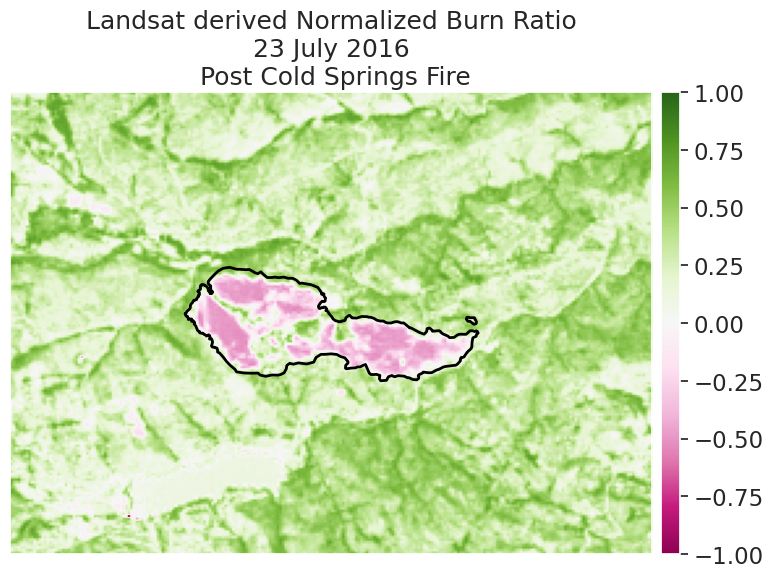

In [10]:
fig, ax = plt.subplots(figsize=(12,6))

ep.plot_bands(landsat_postfire_nbr, cmap='PiYG', vmin=-1, vmax=1, ax=ax, extent=extent_landsat, 
              title="Landsat derived Normalized Burn Ratio\n 23 July 2016 \n Post Cold Springs Fire")
fire_bound_utmz13.plot(ax=ax, color='None', edgecolor='black', linewidth=2)

plt.show()

In [11]:
ls cold-springs-fire/landsat_collect

LC080340322016070701T1-SC20180214145604/
LC080340322016072301T1-SC20180214145802/


In [12]:
all_landsat_bands_path = glob(os.path.join("cold-springs-fire","landsat_collect","LC080340322016070701T1-SC20180214145604","crop","*band[5-7]*.tif"))

all_landsat_bands_path.sort()

landsat_pre_fire = combine_tifs(all_landsat_bands_path)

extent_landsat = plotting_extent(
    landsat_post_fire[0].values, landsat_post_fire.rio.transform())


landsat_prefire_nbr = (landsat_pre_fire[0]-landsat_pre_fire[2]) / (landsat_pre_fire[0]+landsat_pre_fire[2])






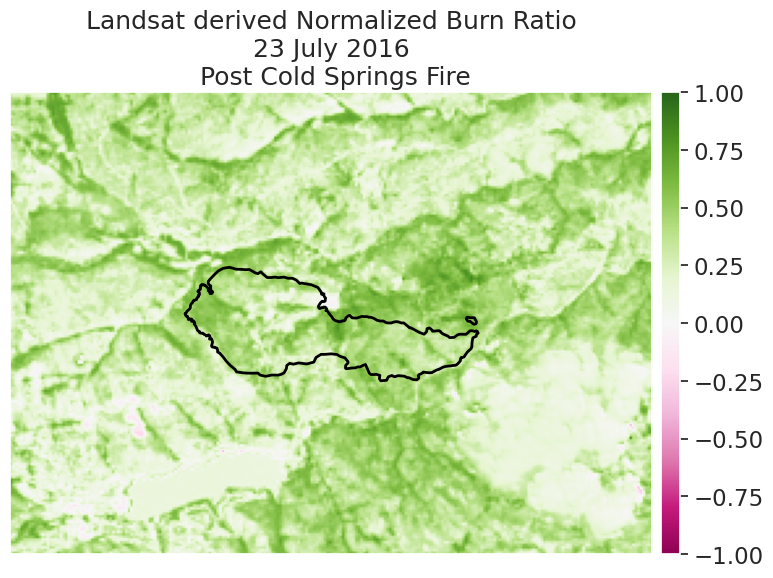

In [13]:
fig, ax = plt.subplots(figsize=(12,6))

ep.plot_bands(landsat_prefire_nbr, cmap='PiYG', vmin=-1, vmax=1, ax=ax, extent=extent_landsat, 
              title="Landsat derived Normalized Burn Ratio\n 23 July 2016 \n Post Cold Springs Fire")
fire_bound_utmz13.plot(ax=ax, color='None', edgecolor='black', linewidth=2)

plt.show()

In [16]:
dnbr_landsat = landsat_prefire_nbr - landsat_postfire_nbr
dnbr_landsat

<xarray.DataArray (y: 177, x: 246)> Size: 174kB
array([[ 0.06053689,  0.09801085,  0.13565655, ..., -0.02277768,
        -0.03019354,  0.00112736],
       [ 0.03737938,  0.09320462,  0.11856693, ..., -0.00827491,
        -0.00438508,  0.00114849],
       [ 0.00139973,  0.06205684,  0.08142802, ..., -0.00807688,
         0.00647721,  0.00447503],
       ...,
       [-0.07159956, -0.00260067,  0.02915099, ..., -0.01685438,
         0.02431214,  0.03168178],
       [ 0.08337121, -0.14558633, -0.07208158, ..., -0.03929183,
        -0.02250457, -0.01183644],
       [-0.111083  ,  0.02821738, -0.00633484, ...,  0.00962946,
        -0.02222264, -0.03099948]], dtype=float32)
Coordinates:
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0

In [17]:
dnbr_class_bins = [-np.inf, -.1, .1, .27, .66, np.inf]

dnbr_landsat_class = xr.apply_ufunc(np.digitize,dnbr_landsat,dnbr_class_bins)

dnbr_landsat_class

<xarray.DataArray (y: 177, x: 246)> Size: 348kB
array([[2, 2, 3, ..., 2, 2, 2],
       [2, 2, 3, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 1, 2, ..., 2, 2, 2],
       [1, 2, 2, ..., 2, 2, 2]])
Coordinates:
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0

In [18]:
dnbr_cat_names = ["Enhanced Regrowth","Unburned","Low Severity","Moderate Severity","High Severity"]

nbr_colors = ["g","yellowgreen","peachpuff","coral","maroon"]

nbr_cmap = ListedColormap(nbr_colors)

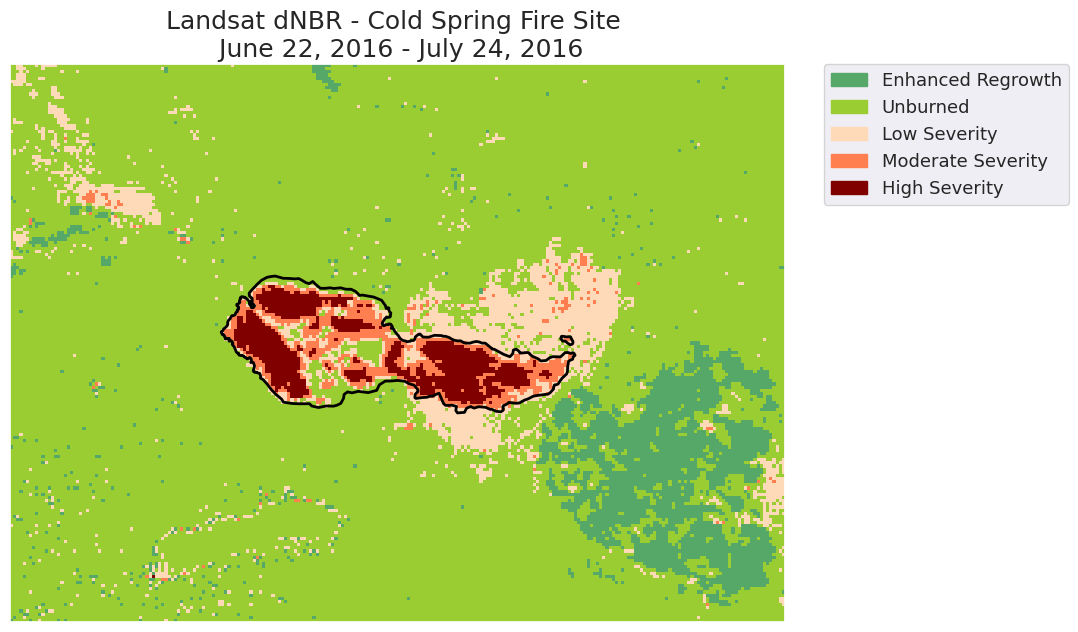

In [19]:
dnbr_landsat_class_plot = ma.masked_array(dnbr_landsat_class.values, dnbr_landsat_class.isnull())

fig, ax = plt.subplots(figsize=(10, 8))

fire_bound_utmz13.plot(ax=ax, color='None',edgecolor='black',linewidth=2)

classes = np.unique(dnbr_landsat_class_plot)
classes = classes.tolist()[:5]

ep.plot_bands(dnbr_landsat_class_plot,cmap=nbr_cmap,vmin=1,vmax=5,title="Landsat dNBR - Cold Spring Fire Site \n June 22, 2016 - July 24, 2016",
cbar=False,scale=False,extent=extent_landsat,ax=ax)

ep.draw_legend(im_ax=ax.get_images()[0],classes=classes,titles=dnbr_cat_names)

plt.show()